# Моделирование NVT ансамбля <a class="tocSkip">

   - Система: $N = 1372$ частиц;
   - Ячейка моделирования: $V = 12.25\sigma\times12.25\sigma\times12.25\sigma$;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Ансамбль: $NVT$;
   - Начальная температура: $T_i = 1.3~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-4}~\varepsilon / k_B$;
   - Скорости охлаждения: $\gamma = 2\times10^{-5}~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $4000000$;
   - Равновесные характеристики системы рассчитывалась через каждые $100000$ шагов;
   - Число шагов на уравновешивание системы при фиксированных внешних условиях: $M=15000$;
   - Число ансамблей $N=5000$;
   - Усреднение по ансамблям при фиксированных внешних условиях: $2N-1$ шагов (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

In [1]:
from pathlib import Path
import sys

BASE_DIR = Path('.').resolve().parent
sys.path.append(str(BASE_DIR))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [4]:
%load_ext autoreload
%autoreload 2

from scripts_old.plotter import Plotter, get_temperature_legend
import scripts_old.postprocessing as pp

In [5]:
CURRENT_DATA_SLOW = '2022-09-25_velocity_scaling_HV_2e-5_T_01e-4'
PLOT_FILENAME_POSTFIX_SLOW = 'cooling_slow'

In [6]:
PATH_TO_CURRENT_DATA_SLOW = BASE_DIR / 'data' / CURRENT_DATA_SLOW
PATH_TO_CURRENT_PLOTS = BASE_DIR / 'plots' / 'article'
PATH_TO_CURRENT_DATA_SLOW

WindowsPath('C:/albert/git_reps/molecular_dynamics/data/2022-09-25_velocity_scaling_HV_2e-5_T_01e-4')

In [7]:
setups_slow = []
rdf_slow = pp.RadialDistributionFunctionPP(path_to_data=str(PATH_TO_CURRENT_DATA_SLOW))

for filename in PATH_TO_CURRENT_DATA_SLOW.iterdir():
    if filename.match('rdf*.csv'):
        parts = filename.stem.split('_')
        setup = {
            'temperature': float(parts[2]),
            'pressure': float(parts[4]) if 'P' in parts else None,
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
        }
        setups_slow.append(setup)

setups_slow = setups_slow[::-1]

for setup_number, setup in enumerate(setups_slow):
    print(setup)
    filename_postfix = pp.get_filename_postfix(setup)
    rdf_slow.append(filename_postfix=filename_postfix)
    rdf_slow.rename_column(column_name='rdf', setup_number=setup_number)

rdf_slow.data

{'temperature': 1.30085, 'pressure': 1.46841, 'heating_velocity': 2e-05}
{'temperature': 1.28989, 'pressure': 1.57989, 'heating_velocity': 2e-05}
{'temperature': 1.27925, 'pressure': 1.59594, 'heating_velocity': 2e-05}
{'temperature': 1.26672, 'pressure': 1.52985, 'heating_velocity': 2e-05}
{'temperature': 1.25772, 'pressure': 1.48432, 'heating_velocity': 2e-05}
{'temperature': 1.25376, 'pressure': 1.44472, 'heating_velocity': 2e-05}
{'temperature': 1.23782, 'pressure': 1.48413, 'heating_velocity': 2e-05}
{'temperature': 1.2235, 'pressure': 1.43532, 'heating_velocity': 2e-05}
{'temperature': 1.22133, 'pressure': 1.40813, 'heating_velocity': 2e-05}
{'temperature': 1.21068, 'pressure': 1.34741, 'heating_velocity': 2e-05}
{'temperature': 1.20243, 'pressure': 1.28345, 'heating_velocity': 2e-05}
{'temperature': 1.19214, 'pressure': 1.30354, 'heating_velocity': 2e-05}
{'temperature': 1.17714, 'pressure': 1.30373, 'heating_velocity': 2e-05}
{'temperature': 1.17006, 'pressure': 1.22686, 'heati

,radius,setup_0,setup_1,setup_2,setup_3,setup_4,setup_5,setup_6,setup_7,setup_8,...,setup_116,setup_117,setup_118,setup_119,setup_120,setup_121,setup_122,setup_123,setup_124,setup_125
0,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,6.07,1.000432,1.001042,1.001388,1.000050,1.000596,1.000957,1.001812,0.999913,1.000725,...,0.823200,0.825190,0.824172,0.821301,0.822618,0.821987,0.822263,0.821089,0.820909,0.821800
607,6.08,1.000061,1.001328,1.001531,0.999776,1.000457,1.000871,1.001006,1.000145,1.001021,...,0.840850,0.839753,0.840248,0.840519,0.840948,0.840806,0.841879,0.840448,0.840215,0.842848
608,6.09,0.999775,1.001865,1.001173,0.999883,1.001421,1.000501,1.002090,1.000467,1.000662,...,0.859820,0.861240,0.860697,0.864293,0.861844,0.863086,0.865753,0.864046,0.865318,0.867723
609,6.10,1.000417,1.001354,1.001370,0.999778,1.001368,1.001007,1.001381,0.999763,1.000835,...,0.881603,0.882764,0.884198,0.885129,0.883503,0.885716,0.886864,0.889398,0.891010,0.890101


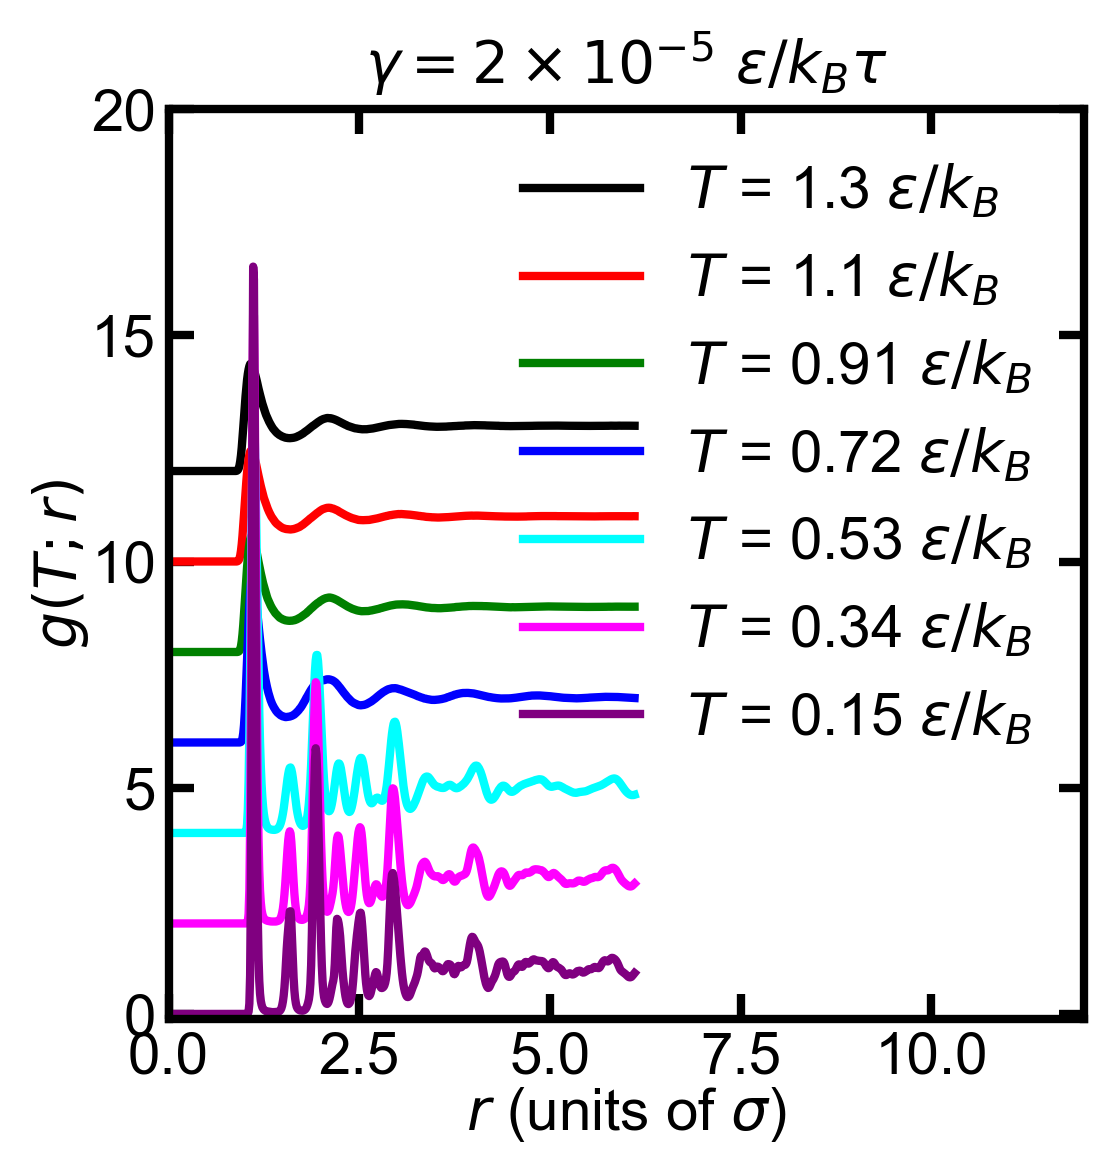

In [8]:
plotter = Plotter(
    path_to_plots=PATH_TO_CURRENT_PLOTS,
    limits=dict(
        left=0,
        right=12,
        bottom=-0.1,
        top=20,
    ),
    labels=('radius', 'rdf'),
)

step = 20
shown=list(range(len(setups_slow)))[::step]
shift = 2
size = len(shown) if shown is not None else len(setups_slow)
j = 0
for i, setup in enumerate(setups_slow):
    if shown is not None and i not in shown:
        continue
    plotter.ax.plot(
        rdf_slow.data['radius'],
        (rdf_slow.data[f'setup_{i}'] + shift  * (size - (j + 1))),
        label=get_temperature_legend(setup["temperature"], accuracy=2),
    )
    j += 1

plotter.get_legend()
# plotter.save_plot(filename=f'rdf_{PLOT_FILENAME_POSTFIX_SLOW}.png')
plotter.set_title(r'$\gamma = 2\times10^{-5}~\varepsilon / k_B\tau$')
plt.show()

In [9]:
rdf_table = rdf_slow.get_rdf_table()
rdf_table
nz_rdf = pd.DataFrame({column: rdf_table[column] for column in rdf_table.columns if rdf_table[column].sum() > 0})
nz_rdf = nz_rdf[nz_rdf.columns[::5]]
nz_rdf

,0.85,0.90,0.95,1.00,1.05,1.10,1.15,1.20,1.25,1.30,...,5.65,5.70,5.75,5.80,5.85,5.90,5.95,6.00,6.05,6.10
setup_0,0.000009,0.009558,0.344447,1.433223,2.246612,2.320838,2.043280,1.685520,1.388274,1.156676,...,0.998808,0.999870,0.999241,1.002204,1.000278,1.001779,1.002217,1.001721,1.001189,1.000417
setup_1,0.000004,0.009577,0.341152,1.419455,2.243877,2.333375,2.042496,1.689760,1.383634,1.167063,...,0.998058,0.998316,0.999223,1.000084,1.001273,1.001211,1.001931,1.001452,1.001185,1.001354
setup_2,0.000009,0.008575,0.333610,1.419715,2.246794,2.337016,2.048350,1.693678,1.391123,1.161244,...,0.998449,0.998852,0.998785,1.000569,0.999872,1.000429,1.001957,1.000776,1.002009,1.001370
setup_3,0.000000,0.008911,0.332534,1.411764,2.255037,2.347474,2.049931,1.686271,1.386048,1.159475,...,0.999322,1.000941,1.000913,1.000808,1.001710,1.000697,1.000674,0.999360,0.999684,0.999778
setup_4,0.000000,0.008257,0.325641,1.403278,2.255470,2.353051,2.059498,1.698661,1.387782,1.155316,...,0.997973,0.999028,1.000157,0.999945,1.001675,1.000993,1.001931,1.001503,1.001429,1.001368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
setup_121,0.000000,0.000000,0.000000,0.000000,0.046074,13.100923,6.161623,0.438449,0.093562,0.054921,...,1.026305,1.163636,1.162462,1.226016,1.210073,1.068770,0.935523,0.864115,0.810606,0.885716
setup_122,0.000000,0.000000,0.000000,0.000000,0.047531,13.223931,6.149108,0.434709,0.092808,0.056059,...,1.023969,1.164968,1.165134,1.229794,1.209617,1.066621,0.933070,0.863494,0.811226,0.886864
setup_123,0.000000,0.000000,0.000000,0.000000,0.041332,13.221660,6.083351,0.420829,0.091126,0.057871,...,1.022402,1.166715,1.162263,1.227691,1.207709,1.065918,0.933018,0.864220,0.807582,0.889398
setup_124,0.000000,0.000000,0.000000,0.000000,0.042482,13.312980,6.021422,0.420328,0.089792,0.059008,...,1.021506,1.167345,1.160967,1.231383,1.208556,1.067360,0.933234,0.864662,0.809657,0.891010


In [10]:
temperatures = np.array([
    setups_slow[value]['temperature']
    for value
    in nz_rdf.index.str[6:].values.astype(np.int32)
])
samples = temperatures[:, np.newaxis]
temperatures, samples

(array([1.30085, 1.28989, 1.27925, 1.26672, 1.25772, 1.25376, 1.23782,
        1.2235 , 1.22133, 1.21068, 1.20243, 1.19214, 1.17714, 1.17006,
        1.15911, 1.1509 , 1.13816, 1.12781, 1.12215, 1.11094, 1.10251,
        1.10127, 1.09435, 1.08095, 1.07053, 1.06138, 1.04958, 1.04323,
        1.02881, 1.02149, 1.01384, 1.00646, 0.99345, 0.98189, 0.96925,
        0.96004, 0.95509, 0.93882, 0.9301 , 0.9244 , 0.91069, 0.9056 ,
        0.90278, 0.89355, 0.88374, 0.87315, 0.86164, 0.85052, 0.8432 ,
        0.83334, 0.8281 , 0.81396, 0.80291, 0.79233, 0.78421, 0.77389,
        0.76392, 0.75233, 0.74382, 0.73293, 0.72328, 0.71405, 0.70254,
        0.70229, 0.692  , 0.68195, 0.67363, 0.66199, 0.65339, 0.64208,
        0.63175, 0.62293, 0.61307, 0.60276, 0.59295, 0.58326, 0.57215,
        0.5623 , 0.55266, 0.54254, 0.53234, 0.52264, 0.51235, 0.50229,
        0.50207, 0.49217, 0.48208, 0.4723 , 0.46207, 0.45234, 0.44191,
        0.43226, 0.42249, 0.41222, 0.40249, 0.39238, 0.38225, 0.37212,
      

In [11]:
CV, N_NEIGHBORS, THRESHOLD = 2, 3, 0.05

In [12]:
def process_1(cv_start: int, cv_finish: int):
    cv_indices = np.arange(cv_start, cv_finish)
    test_indices = np.arange(cv_finish, samples.shape[0])
    train_indices = np.sort(np.random.choice(cv_indices, cv_indices.size // CV, replace=False))
    cv_samples, test_samples = samples[cv_indices], samples[test_indices]
    cv_scores = []

    test_targets = np.zeros((test_samples.shape[0], nz_rdf.shape[1]))
    predicted_targets = np.zeros((test_samples.shape[0], nz_rdf.shape[1]))

    for i, column in enumerate(nz_rdf.columns):
        rdf_values = nz_rdf[column].values
        test_targets[:,i] = rdf_values[test_indices]
        cv_targets = rdf_values[cv_indices]
        regressor = KNeighborsRegressor(
            weights='distance', 
            n_neighbors=N_NEIGHBORS,
        )
        score = cross_val_score(
            regressor, 
            cv_samples, 
            cv_targets,
            scoring='neg_mean_squared_error',
            cv=CV,
        ).mean()
        cv_scores.append(-score)        
        regressor.fit(samples[train_indices], rdf_values[train_indices])
        predicted_targets[:,i] = regressor.predict(test_samples)
    max_cv_score = np.max(cv_scores)
    quantile_cv_score = np.quantile(cv_scores, 0.95)
    test_scores = [
        mean_squared_error(test_target, predicted_target) 
        for test_target, predicted_target
        in zip(test_targets, predicted_targets)
    ]
    return max_cv_score, quantile_cv_score, test_scores

In [13]:
cv_start = 0
simulated_temperatures_numbers = np.arange(cv_start + CV * N_NEIGHBORS, samples.shape[0])
max_cv_scores = np.zeros(simulated_temperatures_numbers.size)
quantile_cv_scores = np.zeros(simulated_temperatures_numbers.size)
test_scores_array = []
breaks = []
for i, simulated_temperatures_number in enumerate(simulated_temperatures_numbers):
    max_cv_score, quantile_cv_score, test_scores = process_1(cv_start=cv_start, cv_finish=simulated_temperatures_number)
    print(f'Simulated temperatures number: {simulated_temperatures_number}, Max MSE = {max_cv_score}')
#     if max_cv_score >= THRESHOLD:
#         cv_start = max(simulated_temperatures_number - CV * N_NEIGHBORS, 0)
#         breaks.append([i, cv_start])
#         print(f'{cv_start=}')
#         continue
    max_cv_scores[i] = max_cv_score
    quantile_cv_scores[i] = quantile_cv_score
    test_scores_array.append(test_scores) 
    
breaks = np.array(breaks)

Simulated temperatures number: 6, Max MSE = 0.0004371003550805015
Simulated temperatures number: 7, Max MSE = 0.0004749357882331448
Simulated temperatures number: 8, Max MSE = 0.000549749198158332
Simulated temperatures number: 9, Max MSE = 0.0005293303996033603
Simulated temperatures number: 10, Max MSE = 0.0006337986015185506
Simulated temperatures number: 11, Max MSE = 0.0007931800738220589
Simulated temperatures number: 12, Max MSE = 0.0008958037650401674
Simulated temperatures number: 13, Max MSE = 0.0009627242526917838
Simulated temperatures number: 14, Max MSE = 0.0011229392220042035
Simulated temperatures number: 15, Max MSE = 0.0013003482715517856
Simulated temperatures number: 16, Max MSE = 0.0014876316915802988
Simulated temperatures number: 17, Max MSE = 0.0019479096730297297
Simulated temperatures number: 18, Max MSE = 0.002111082054886329
Simulated temperatures number: 19, Max MSE = 0.002304576537006272
Simulated temperatures number: 20, Max MSE = 0.002520800577870871
Sim

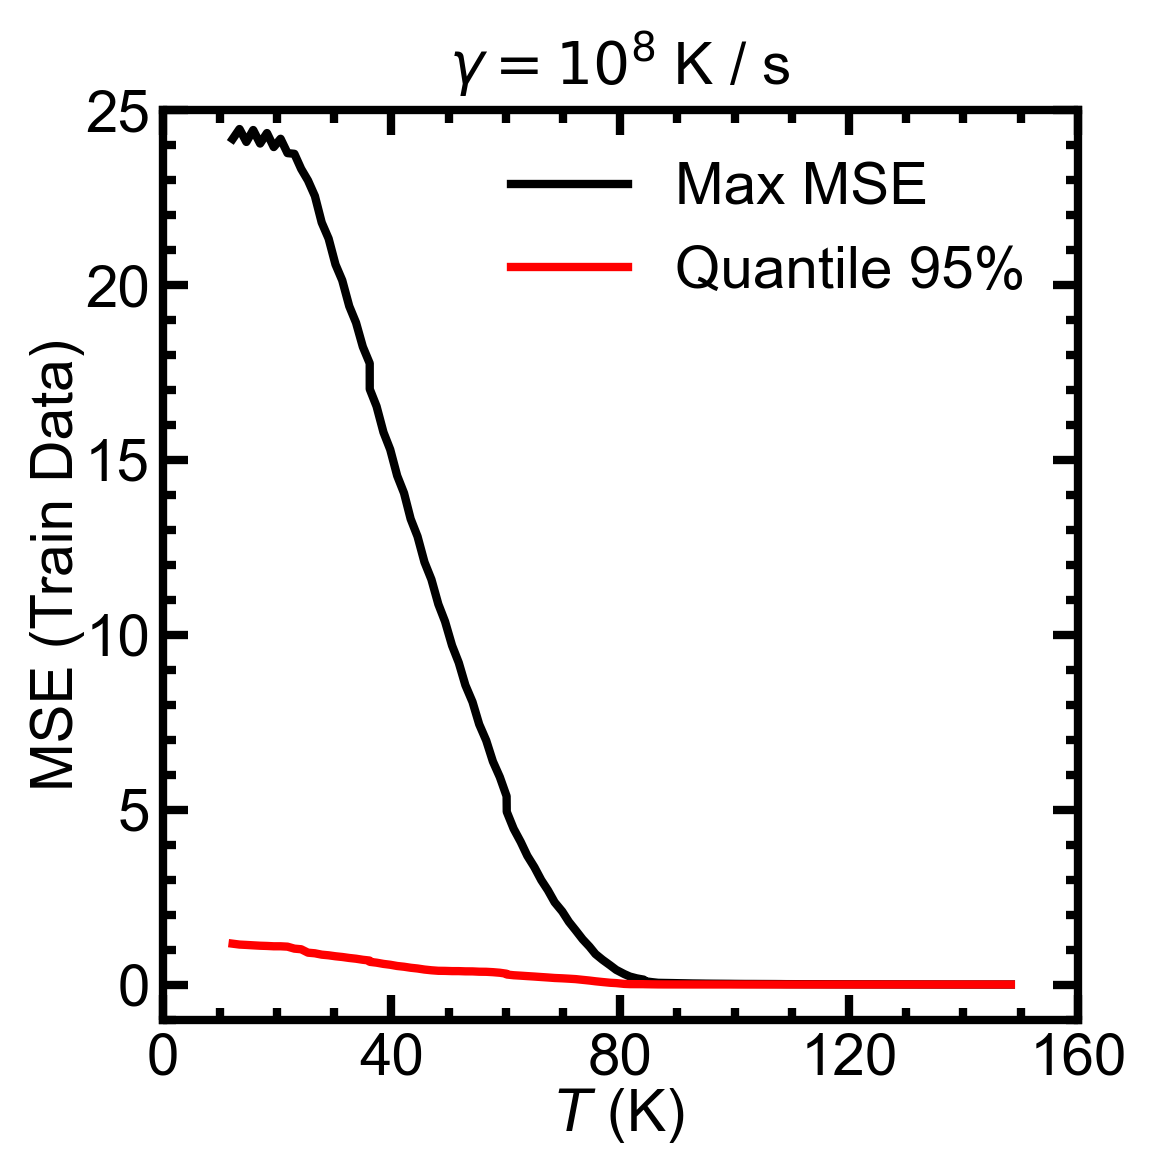

In [14]:
plotter = Plotter(
    path_to_plots=PATH_TO_CURRENT_PLOTS,
    limits=dict(
        left=0,
        right=160,
        bottom=-1,
        top=25,
    ),
    labels=(r'$T$ (K)', 'MSE (Train Data)'),
)

kelvins = temperatures[simulated_temperatures_numbers] * 119.8
plotter.ax.plot(kelvins, max_cv_scores, label='Max MSE')
plotter.ax.plot(kelvins, quantile_cv_scores, label='Quantile 95%')
plotter.get_legend()
# plotter.set_title(r'$\gamma = 2\times10^{-5}~\varepsilon / k_B\tau$')
plotter.set_title(r'$\gamma = 10^{8}$ K / s')
plotter.set_major_locators(x_step=40, y_step=5)
plotter.set_minor_locators(x_step=10, y_step=1)
plotter.save_plot('mse_train_data_full_interval')

plt.show()

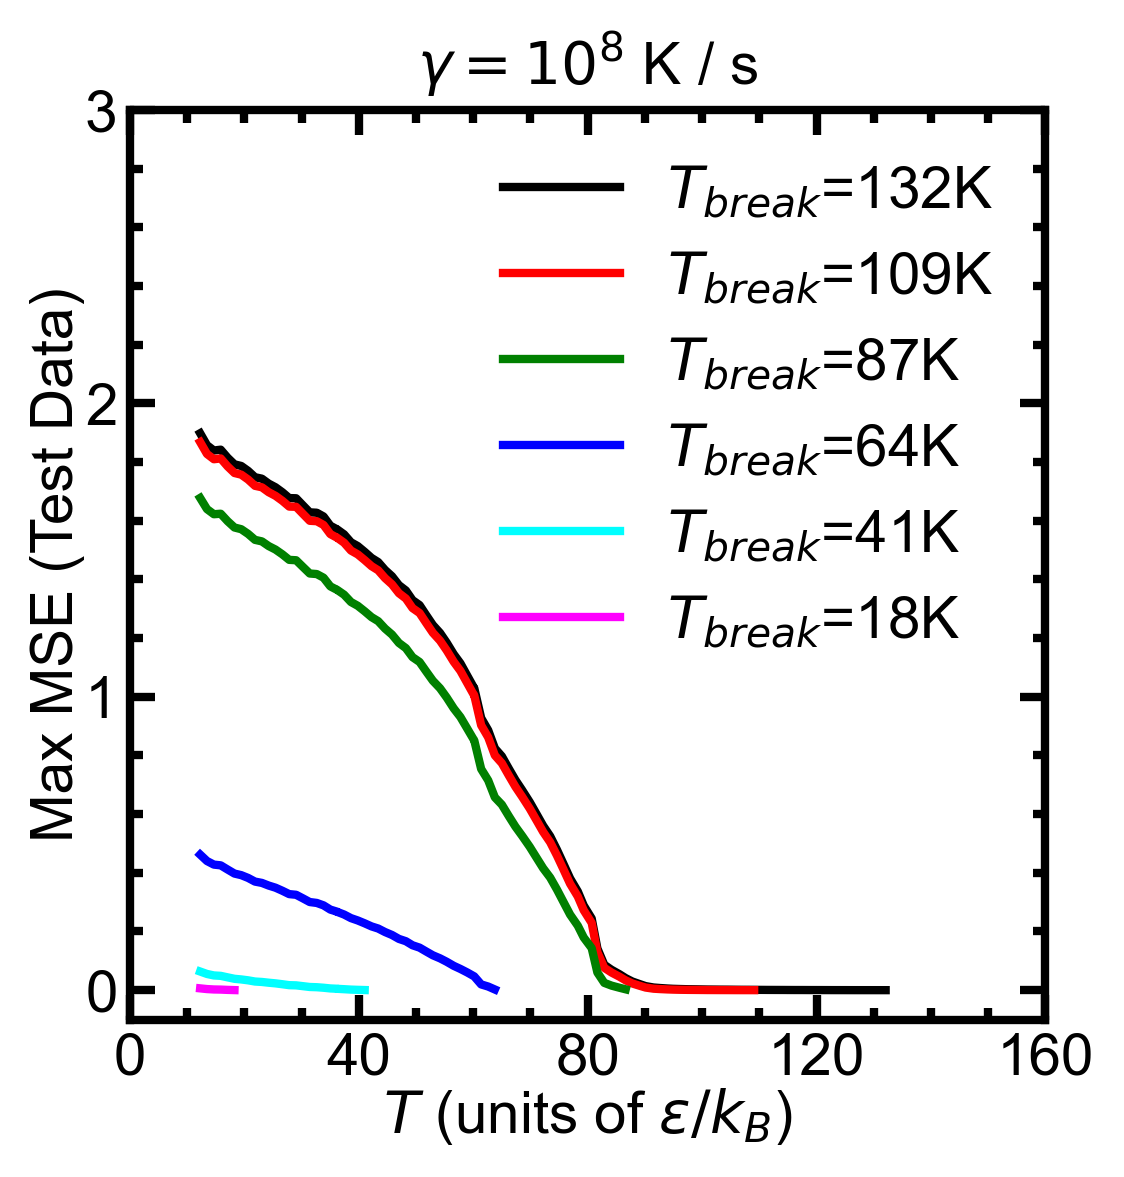

In [15]:
plotter = Plotter(
    path_to_plots=PATH_TO_CURRENT_PLOTS,
    limits=dict(
        left=0,
        right=160,
        bottom=-0.1,
        top=3,
    ),
    labels=('temperature', 'Max MSE (Test Data)'),
)

for n_t, test_scores in zip(simulated_temperatures_numbers, test_scores_array):
    if n_t % 20:
        continue
    x = temperatures[np.arange(n_t, samples.shape[0])]
    kelvins = x * 119.8
    try:
        plotter.ax.plot(kelvins, test_scores, label=fr'$T_{{break}}$={temperatures[n_t] * 119.8:.0f}K')
    except ValueError:
        print(n_t, x.size, len(test_scores), x.size-len(test_scores))
        continue
plotter.get_legend()
# plotter.set_title(r'$\gamma = 2\times10^{-5}~\varepsilon / k_B\tau$')
plotter.set_title(r'$\gamma = 10^{8}$ K / s')
plotter.set_major_locators(x_step=40, y_step=1)
plotter.set_minor_locators(x_step=10, y_step=0.2)
plotter.save_plot('mse_test_data_full_interval')
plt.show()

Сделать:

Охлаждаем систему до температуры T1, предсказываем температуру T2, затем охлаждаем до T2, считаем ошибку. Построить график зависимости и посмотреть, как меняется.

In [16]:
def process_2(cv_start: int, cv_finish: int):
    cv_indices = np.arange(cv_start, cv_finish)
    cv_samples = samples[cv_indices]
    cv_scores = []
    
    test_indices = np.array([cv_finish])
    test_samples = samples[test_indices]
    
    train_indices = np.sort(np.random.choice(cv_indices, cv_indices.size // CV, replace=False))

    test_targets = np.zeros(nz_rdf.shape[1])
    predicted_targets = np.zeros(nz_rdf.shape[1])

    for i, column in enumerate(nz_rdf.columns):
        rdf_values = nz_rdf[column].values
        test_targets[i] = rdf_values[test_indices]
        cv_targets = rdf_values[cv_indices]
        regressor = KNeighborsRegressor(
            weights='distance', 
            n_neighbors=N_NEIGHBORS,
        )
        score = cross_val_score(
            regressor, 
            cv_samples, 
            cv_targets,
            scoring='neg_mean_squared_error',
            cv=CV,
        ).mean()
        cv_scores.append(-score)        
        regressor.fit(samples[train_indices], rdf_values[train_indices])
        predicted_targets[i] = regressor.predict(test_samples)
    max_cv_score = np.max(cv_scores)
    quantile_cv_score = np.quantile(cv_scores, 0.95)
    test_score = mean_squared_error(test_targets, predicted_targets)
    return max_cv_score, quantile_cv_score, test_score

In [17]:
cv_start = 0
simulated_temperatures_numbers = np.arange(cv_start + CV * N_NEIGHBORS, samples.shape[0])
max_cv_scores = np.zeros(simulated_temperatures_numbers.size)
quantile_cv_scores = np.zeros(simulated_temperatures_numbers.size)
test_scores = np.zeros(simulated_temperatures_numbers.size)
for i, simulated_temperatures_number in enumerate(simulated_temperatures_numbers):
    max_cv_score, quantile_cv_score, test_score = process_2(cv_start=cv_start, cv_finish=simulated_temperatures_number)
    print(f'Simulated temperatures number: {simulated_temperatures_number}, Max MSE = {max_cv_score}')
    max_cv_scores[i] = max_cv_score
    quantile_cv_scores[i] = quantile_cv_score
    test_scores[i] = test_score

Simulated temperatures number: 6, Max MSE = 0.0004371003550805015
Simulated temperatures number: 7, Max MSE = 0.0004749357882331448
Simulated temperatures number: 8, Max MSE = 0.000549749198158332
Simulated temperatures number: 9, Max MSE = 0.0005293303996033603
Simulated temperatures number: 10, Max MSE = 0.0006337986015185506
Simulated temperatures number: 11, Max MSE = 0.0007931800738220589
Simulated temperatures number: 12, Max MSE = 0.0008958037650401674
Simulated temperatures number: 13, Max MSE = 0.0009627242526917838
Simulated temperatures number: 14, Max MSE = 0.0011229392220042035
Simulated temperatures number: 15, Max MSE = 0.0013003482715517856
Simulated temperatures number: 16, Max MSE = 0.0014876316915802988
Simulated temperatures number: 17, Max MSE = 0.0019479096730297297
Simulated temperatures number: 18, Max MSE = 0.002111082054886329
Simulated temperatures number: 19, Max MSE = 0.002304576537006272
Simulated temperatures number: 20, Max MSE = 0.002520800577870871
Sim

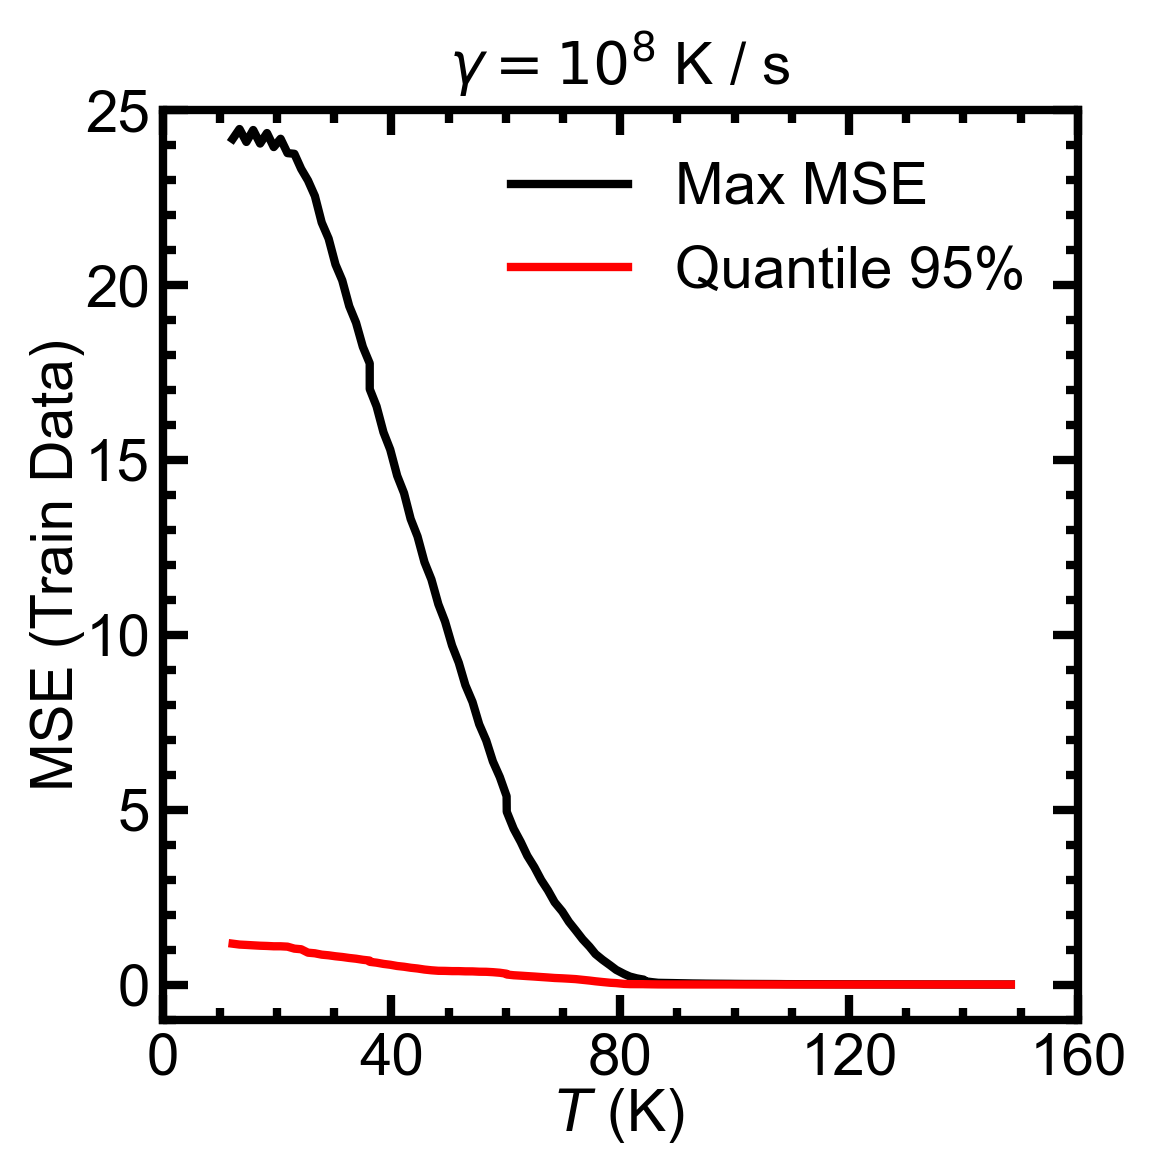

In [18]:
plotter = Plotter(
    path_to_plots=PATH_TO_CURRENT_PLOTS,
    limits=dict(
        left=0,
        right=160,
        bottom=-1,
        top=25,
    ),
    labels=(r'$T$ (K)', 'MSE (Train Data)'),
)

kelvins = temperatures[simulated_temperatures_numbers] * 119.8
plotter.ax.plot(kelvins, max_cv_scores, label='Max MSE')
plotter.ax.plot(kelvins, quantile_cv_scores, label='Quantile 95%')
plotter.get_legend()
# plotter.set_title(r'$\gamma = 2\times10^{-5}~\varepsilon / k_B\tau$')
plotter.set_title(r'$\gamma = 10^{8}$ K / s')
plotter.set_major_locators(x_step=40, y_step=5)
plotter.set_minor_locators(x_step=10, y_step=1)
plotter.save_plot('mse_train_data_next_temperature')

plt.show()

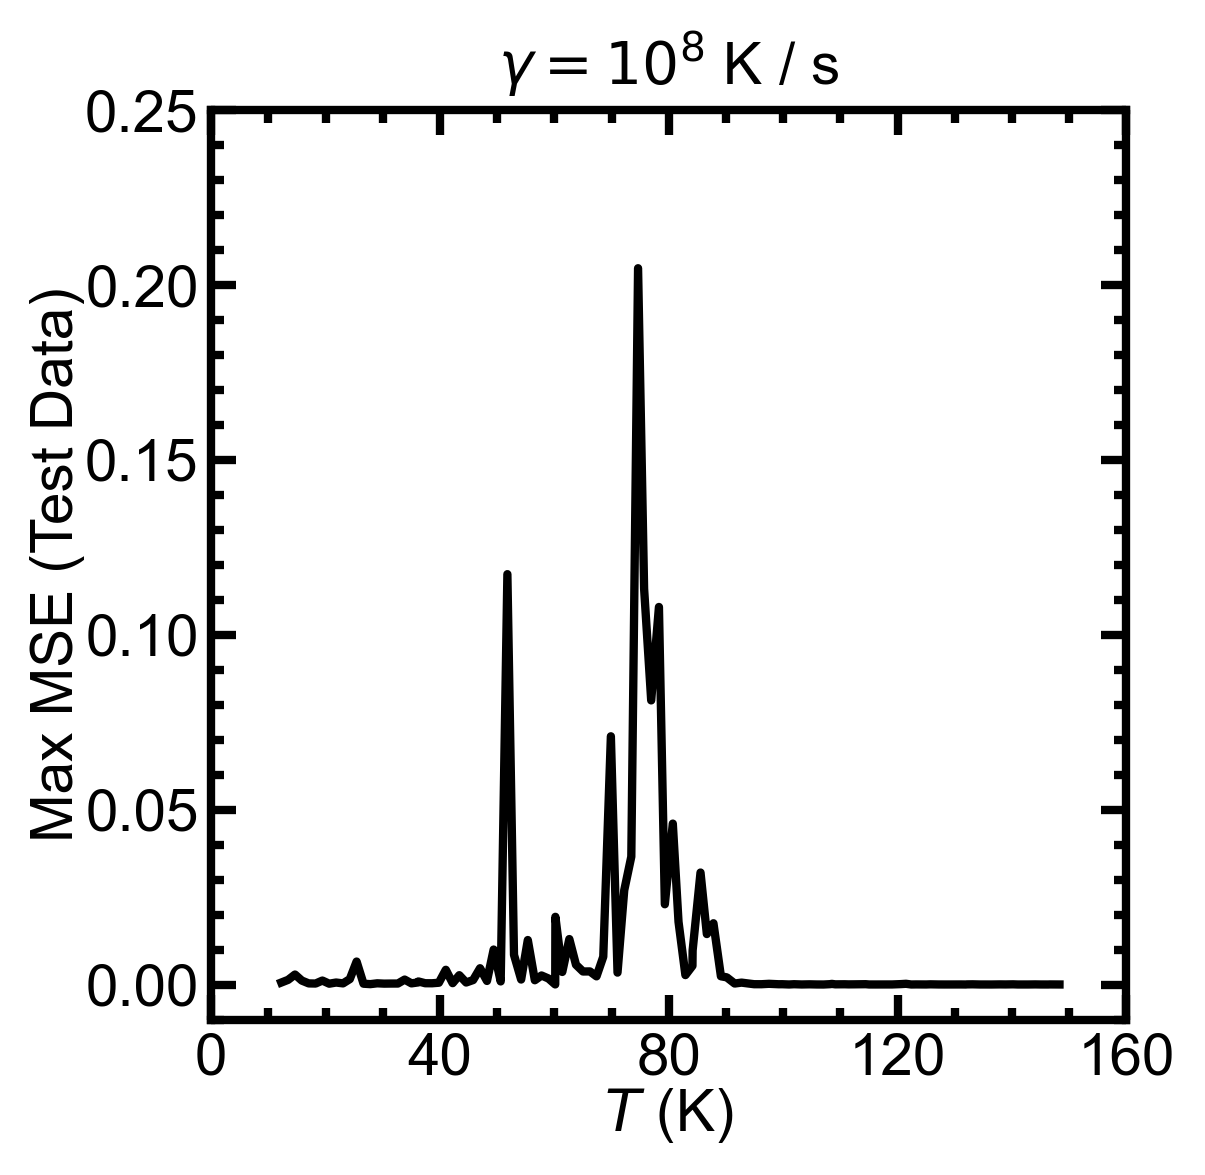

In [22]:
plotter = Plotter(
    path_to_plots=PATH_TO_CURRENT_PLOTS,
    limits=dict(
        left=0,
        right=160,
        bottom=-0.01,
        top=0.25,
    ),
    labels=(r'$T$ (K)', 'Max MSE (Test Data)'),
)

kelvins = temperatures[simulated_temperatures_numbers] * 119.8
plotter.ax.plot(kelvins, test_scores)
# plotter.set_title(r'$\gamma = 2\times10^{-5}~\varepsilon / k_B\tau$')
plotter.set_title(r'$\gamma = 10^{8}$ K / s')
plotter.set_major_locators(x_step=40, y_step=0.05)
plotter.set_minor_locators(x_step=10, y_step=0.01)
plotter.save_plot('mse_test_data_next_temperature')
plt.show()